Name: Ying Wang

Github Username: Notrew

USC ID: 9965632493

In [1]:
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns
# import math

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.svm import SVC,LinearSVC
from sklearn.preprocessing import scale
from sklearn.metrics import hamming_loss,accuracy_score,silhouette_score
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
import random
import statistics

import warnings
warnings.filterwarnings("ignore")

### 1.a Choose 70% of the data randomly as the training set.

In [3]:
# read data
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/MyDrive/Colab/552-hw7/data/Frogs_MFCCs.csv")
df = pd.read_csv("../data/Frogs_MFCCs.csv")
df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [4]:
# Choose 70% of the data randomly as the training set
x_train,x_test,y_train,y_test = train_test_split(df.iloc[:,:-4],df.iloc[:,-4:-1],test_size=0.3,random_state=2)

### 1.b 
Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem.
One of the most important approaches to multi-label classification is to **train a classifier for each label** (binary relevance). We first try this approach:

#### i. Research exact match and hamming score/ loss methods for evaluating multilabel classification and use them in evaluating the classifiers in this problem.

1. exact match:
        exact match ratio is a strict metric of the model performance for multi-label problem types. The exact match ratio value is 1 when the model is perfect, and 0 when the model is very bad.
        Exact match ratio = Total number of examples/Number of examples with exact label match
2. hamming loss:
        Hamming loss is the fraction of wrong labels to the total number of labels. Lower the Hamming loss better the model performance.

#### ii. Train a SVM for each of the labels, using *Gaussian kernels* and *one versus all classifiers*. 

Determine the **weight of the SVM penalty** and the **width of the Gaussian Kernel** using **10 fold cross validation**. You are welcome to try to solve the problem with both standardized and raw attributes and report the results.

In [5]:
# for Family
# 10 fold cross validation to determine C and gamma
# test on very large and small parameters
para_c = [0.01,0.1,1,5,10,100,1000]
para_gamma = [0.01,0.1,1,2,5,10]
cv_score = {}
for c in para_c:
    for gamma in para_gamma:
        clf = SVC(kernel="rbf",decision_function_shape="ovr",C=c,gamma=gamma)
        score = cross_val_score(clf,x_train,y_train["Family"],cv=10).mean()
    if score>0.95:
        cv_score[(c,gamma)] = score
        print(c,gamma,score)

0.1 10 0.9741854428981664
1 10 0.9870917353024709
5 10 0.9884822020259396
10 10 0.9884822020259396
100 10 0.9884822020259396
1000 10 0.9884822020259396


In [6]:
good_pair = max(cv_score, key=cv_score.get)
print("good c and gamma is:",good_pair,"and its cv score is:",cv_score[good_pair])
cv_score.pop(good_pair)
second_good_pair = max(cv_score, key=cv_score.get)
print("second good c and gamma is:",second_good_pair,"and its cv score is:",cv_score[second_good_pair])

good c and gamma is: (5, 10) and its cv score is: 0.9884822020259396
second good c and gamma is: (10, 10) and its cv score is: 0.9884822020259396


In [7]:
# 10 fold cross validation between selected points
para_c = np.linspace(good_pair[0],second_good_pair[0],20)
para_gamma = np.linspace(good_pair[1],second_good_pair[1],10)
cv_score = {}
for c in para_c:
    for gamma in para_gamma:
        clf = SVC(kernel="rbf",decision_function_shape="ovr",C=c,gamma=gamma)
        score = cross_val_score(clf,x_train,y_train["Family"],cv=10).mean()
        cv_score[(c,gamma)] = score
best_pair = max(cv_score, key=cv_score.get)
print("best c and gamma is:",best_pair,"and its cv score is:",cv_score[best_pair])

best c and gamma is: (5.0, 10.0) and its cv score is: 0.9884822020259396


In [8]:
# refit and calculate test error
# best_pair = (5.7894736842105265, 2.0)
clf = SVC(kernel="rbf",decision_function_shape="ovr",C=best_pair[0],gamma=best_pair[1])
score = cross_val_score(clf,x_test,y_test["Family"],cv=10).mean()
clf.fit(x_train,y_train["Family"])
y_pred = clf.predict(x_test)
hamming_loss_score = hamming_loss(y_test["Family"], y_pred)
# print("train error is:",1-0.9922555934235854 ,"\ntest erroe is:",1-score,"\nhamming loss is:",hamming_loss_score)
print("train error is:",1-cv_score[best_pair],"\ntest erroe is:",1-score,"\nhamming loss is:",hamming_loss_score)


train error is: 0.011517797974060384 
test erroe is: 0.01713393626184312 
hamming loss is: 0.012968967114404817


In [9]:
# for Genus
# 10 fold cross validation to determine C and gamma
# test on very large and small parameters
para_c = [0.01,0.1,1,5,10,100,1000]
para_gamma = [0.01,0.1,1,2,5,10]
cv_score = {}
for c in para_c:
    for gamma in para_gamma:
        clf = SVC(kernel="rbf",decision_function_shape="ovr",C=c,gamma=gamma)
        score = cross_val_score(clf,x_train,y_train["Genus"],cv=10).mean()
    if score>0.95:
        cv_score[(c,gamma)] = score
        print(c,gamma,score)

1 10 0.9787532740067532
5 10 0.9815334185364005
10 10 0.9815334185364005
100 10 0.9815334185364005
1000 10 0.9815334185364005


In [10]:
good_pair = max(cv_score, key=cv_score.get)
print("good c and gamma is:",good_pair,"and its cv score is:",cv_score[good_pair])
cv_score.pop(good_pair)
second_good_pair = max(cv_score, key=cv_score.get)
print("second good c and gamma is:",second_good_pair,"and its cv score is:",cv_score[second_good_pair])

good c and gamma is: (5, 10) and its cv score is: 0.9815334185364005
second good c and gamma is: (10, 10) and its cv score is: 0.9815334185364005


In [11]:
# 10 fold cross validation between selected points
para_c = np.linspace(good_pair[0],second_good_pair[0],20)
para_gamma = np.linspace(good_pair[1],second_good_pair[1],10)
cv_score = {}
for c in para_c:
    for gamma in para_gamma:
        clf = SVC(kernel="rbf",decision_function_shape="ovr",C=c,gamma=gamma)
        score = cross_val_score(clf,x_train,y_train["Genus"],cv=10).mean()
        cv_score[(c,gamma)] = score
best_pair = max(cv_score, key=cv_score.get)
print("best c and gamma is:",best_pair,"and its cv score is:",cv_score[best_pair])

best c and gamma is: (5.0, 10.0) and its cv score is: 0.9815334185364005


In [12]:
# refit and calculate test error
# best_pair = (10.0, 1.0)
clf = SVC(kernel="rbf",decision_function_shape="ovr",C=best_pair[0],gamma=best_pair[1])
score = cross_val_score(clf,x_test,y_test["Genus"],cv=10).mean()
clf.fit(x_train,y_train["Genus"])
y_pred = clf.predict(x_test)
hamming_loss_score = hamming_loss(y_test["Genus"], y_pred)
# print("train error is:",1-0.9910647227744643,"\ntest erroe is:",1-score,"\nhamming loss is:",hamming_loss_score)
print("train error is:",1-cv_score[best_pair],"\ntest erroe is:",1-score,"\nhamming loss is:",hamming_loss_score)

train error is: 0.018466581463599474 
test erroe is: 0.029640396210163567 
hamming loss is: 0.01713756368689208


In [13]:
# for Species
# 10 fold cross validation to determine C and gamma
# test on very large and small parameters
para_c = [0.01,0.1,1,5,10,100,1000]
para_gamma = [0.01,0.1,1,2,5,10]
cv_score = {}
for c in para_c:
    for gamma in para_gamma:
        clf = SVC(kernel="rbf",decision_function_shape="ovr",C=c,gamma=gamma)
        score = cross_val_score(clf,x_train,y_train["Species"],cv=10).mean()
    if score>0.95:
        cv_score[(c,gamma)] = score
        print(c,gamma,score)

1 10 0.9755774874562151
5 10 0.9769671652623939
10 10 0.9769671652623939
100 10 0.9769671652623939
1000 10 0.9769671652623939


In [14]:
good_pair = max(cv_score, key=cv_score.get)
print("good c and gamma is:",good_pair,"and its cv score is:",cv_score[good_pair])
cv_score.pop(good_pair)
second_good_pair = max(cv_score, key=cv_score.get)
print("second good c and gamma is:",second_good_pair,"and its cv score is:",cv_score[second_good_pair])

good c and gamma is: (5, 10) and its cv score is: 0.9769671652623939
second good c and gamma is: (10, 10) and its cv score is: 0.9769671652623939


In [15]:
# 10 fold cross validation between selected points
para_c = np.linspace(good_pair[0],second_good_pair[0],20)
para_gamma = np.linspace(good_pair[1],second_good_pair[1],10)
cv_score = {}
for c in para_c:
    for gamma in para_gamma:
        clf = SVC(kernel="rbf",decision_function_shape="ovr",C=c,gamma=gamma)
        score = cross_val_score(clf,x_train,y_train["Species"],cv=10).mean()
        cv_score[(c,gamma)] = score
best_pair = max(cv_score, key=cv_score.get)
print("best c and gamma is:",best_pair,"and its cv score is:",cv_score[best_pair])

best c and gamma is: (5.0, 10.0) and its cv score is: 0.9769671652623939


In [16]:
# refit and calculate test error
# best_pair = (8.947368421052632, 1.6666666666666667)
clf = SVC(kernel="rbf",decision_function_shape="ovr",C=best_pair[0],gamma=best_pair[1])
score = cross_val_score(clf,x_test,y_test["Species"],cv=10).mean()
clf.fit(x_train,y_train["Species"])
y_pred = clf.predict(x_test)
hamming_loss_score = hamming_loss(y_test["Species"], y_pred)
# print("train error is:",1-0.991066695067689,"\ntest erroe is:",1-score,"\nhamming loss is:",hamming_loss_score)
print("train error is:",1-cv_score[best_pair],"\ntest erroe is:",1-score,"\nhamming loss is:",hamming_loss_score)

train error is: 0.02303283473760609 
test erroe is: 0.03287683031869082 
hamming loss is: 0.02269569245020843


#### iii. Repeat 1(b)ii with L1-penalized SVMs.Remember to *standardize the attributes*. 

Determine the weight of the SVM penalty using 10 fold cross validation.

In [17]:
# standardize the attributes
x_train_z = scale(x_train)

In [18]:
# for Family
# 10 fold cross validation to determine C and gamma
# test on very large and small parameters
para_c = [0.01,0.1,1,5,10,100,1000]
cv_score = {}
for c in para_c:
    lnclf = LinearSVC(penalty="l1",multi_class="ovr",dual=False,C=c)
    score = cross_val_score(lnclf,x_train_z,y_train["Family"],cv=10).mean()
    if score>0.9:
        cv_score[c] = score
        print(c,score)

0.01 0.9233480071949257
0.1 0.9362582441856796
1 0.9338749250528575
5 0.9338749250528575
10 0.9338749250528575
100 0.9338749250528575
1000 0.9338749250528575


In [19]:
good_c = max(cv_score, key=cv_score.get)
print("good c is:",good_c,"and its cv score is:",cv_score[good_c])
cv_score.pop(good_c)
second_good_c = max(cv_score, key=cv_score.get)
print("second good c is:",second_good_c,"and its cv score is:",cv_score[second_good_c])

good c is: 0.1 and its cv score is: 0.9362582441856796
second good c is: 1 and its cv score is: 0.9338749250528575


In [20]:
# 10 fold cross validation between selected points
para_c = np.linspace(good_c,second_good_c,20)
cv_score = {}
for c in para_c:
    lnclf = LinearSVC(penalty="l1",multi_class="ovr",dual=False,C=c)
    score = cross_val_score(lnclf,x_train_z,y_train["Family"],cv=10).mean()
    cv_score[c] = score
best_c = max(cv_score, key=cv_score.get)
print("best c is:",best_c,"and its cv score is:",cv_score[best_c])

best c is: 0.1 and its cv score is: 0.9362582441856796


In [21]:
# refit and calculate test error
# best_c = 5.0
lnclf = LinearSVC(penalty="l1",multi_class="ovr",dual=False,C=best_c)
score = cross_val_score(lnclf,x_test,y_test["Family"],cv=10).mean()
lnclf.fit(x_train,y_train["Family"])
y_pred = lnclf.predict(x_test)
hamming_loss_score = hamming_loss(y_test["Family"], y_pred)
# print("train error is:",1-0.9342717504496829,"\ntest erroe is:",1-score,"\nhamming loss is:",hamming_loss_score)
print("train error is:",1-cv_score[best_c],"\ntest erroe is:",1-score,"\nhamming loss is:",hamming_loss_score)

train error is: 0.0637417558143204 
test erroe is: 0.0764190353143841 
hamming loss is: 0.06855025474756832


In [22]:
# for Genus
# 10 fold cross validation to determine C and gamma
# test on very large and small parameters
para_c = [0.01,0.1,1,5,10,100,1000]
cv_score = {}
for c in para_c:
    lnclf = LinearSVC(penalty="l1",multi_class="ovr",dual=False,C=c)
    score = cross_val_score(lnclf,x_train_z,y_train["Genus"],cv=10).mean()
    if score>0.9:
        cv_score[c] = score
        print(c,score)

0.01 0.9120294108365679
0.1 0.9398300672157529
1 0.9445982833159772
5 0.9459891444980908
10 0.9461875571965035
100 0.9455923191012653
1000 0.9457907317996781


In [23]:
good_c = max(cv_score, key=cv_score.get)
print("good c is:",good_c,"and its cv score is:",cv_score[good_c])
cv_score.pop(good_c)
second_good_c = max(cv_score, key=cv_score.get)
print("second good c is:",second_good_c,"and its cv score is:",cv_score[second_good_c])

good c is: 10 and its cv score is: 0.9461875571965035
second good c is: 5 and its cv score is: 0.9459891444980908


In [24]:
# 10 fold cross validation between selected points
para_c = np.linspace(good_c,second_good_c,20)
cv_score = {}
for c in para_c:
    lnclf = LinearSVC(penalty="l1",multi_class="ovr",dual=False,C=c)
    score = cross_val_score(lnclf,x_train_z,y_train["Genus"],cv=10).mean()
    cv_score[c] = score
best_c = max(cv_score, key=cv_score.get)
print("best c is:",best_c,"and its cv score is:",cv_score[best_c])

best c is: 10.0 and its cv score is: 0.9461875571965035


In [25]:
# refit and calculate test error
# best_c = 8.947368421052632
lnclf = LinearSVC(penalty="l1",multi_class="ovr",dual=False,C=best_c)
score = cross_val_score(lnclf,x_test,y_test["Genus"],cv=10).mean()
lnclf.fit(x_train,y_train["Genus"])
y_pred = lnclf.predict(x_test)
hamming_loss_score = hamming_loss(y_test["Genus"], y_pred)
# print("train error is:",1-0.9461875571965035,"\ntest erroe is:",1-score,"\nhamming loss is:",hamming_loss_score)
print("train error is:",1-cv_score[best_c],"\ntest erroe is:",1-score,"\nhamming loss is:",hamming_loss_score)

train error is: 0.05381244280349651 
test erroe is: 0.04538759689922478 
hamming loss is: 0.05141269106067624


In [26]:
# for Species
# 10 fold cross validation to determine C and gamma
# test on very large and small parameters
para_c = [0.01,0.1,1,5,10,100,1000]
cv_score = {}
for c in para_c:
    lnclf = LinearSVC(penalty="l1",multi_class="ovr",dual=False,C=c)
    score = cross_val_score(lnclf,x_train_z,y_train["Species"],cv=10).mean()
    if score>0.9:
        cv_score[c] = score
        print(c,score)

0.01 0.9142143172709772
0.1 0.9445963110227524
1 0.9537307898639906
5 0.9543264224178738
10 0.9553196692858721
100 0.9551212565874595
1000 0.9551212565874595


In [27]:
good_c = max(cv_score, key=cv_score.get)
print("good c is:",good_c,"and its cv score is:",cv_score[good_c])
cv_score.pop(good_c)
second_good_c = max(cv_score, key=cv_score.get)
print("second good c is:",second_good_c,"and its cv score is:",cv_score[second_good_c])

good c is: 10 and its cv score is: 0.9553196692858721
second good c is: 100 and its cv score is: 0.9551212565874595


In [28]:
# 10 fold cross validation between selected points
para_c = np.linspace(good_c,second_good_c,20)
cv_score = {}
for c in para_c:
    lnclf = LinearSVC(penalty="l1",multi_class="ovr",dual=False,C=c)
    score = cross_val_score(lnclf,x_train_z,y_train["Species"],cv=10).mean()
    cv_score[c] = score
best_c = max(cv_score, key=cv_score.get)
print("best c is:",best_c,"and its cv score is:",cv_score[best_c])

best c is: 14.736842105263158 and its cv score is: 0.9553196692858721


In [29]:
# refit and calculate test error
# best_c = 10.0
lnclf = LinearSVC(penalty="l1",multi_class="ovr",dual=False,C=best_c)
score = cross_val_score(lnclf,x_test,y_test["Species"],cv=10).mean()
lnclf.fit(x_train,y_train["Species"])
y_pred = lnclf.predict(x_test)
hamming_loss_score = hamming_loss(y_test["Species"], y_pred)
# print("train error is:",1-0.9553196692858721,"\ntest erroe is:",1-score,"\nhamming loss is:",hamming_loss_score)
print("train error is:",1-cv_score[best_c],"\ntest erroe is:",1-score,"\nhamming loss is:",hamming_loss_score)

train error is: 0.044680330714127914 
test erroe is: 0.03843884582256685 
hamming loss is: 0.042612320518758684


#### iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. 

In [30]:
# use smote
smo = SMOTE()
x_train_f_smo,y_train_f_smo = smo.fit_resample(x_train,y_train["Family"])
x_train_g_smo,y_train_g_smo = smo.fit_resample(x_train,y_train["Genus"])
x_train_s_smo,y_train_s_smo = smo.fit_resample(x_train,y_train["Species"])

In [31]:
# for Family
# 10 fold cross validation to determine C
# test on very large and small parameters
para_c = [0.01,0.1,1,5,10,100,1000]
cv_score = {}
for c in para_c:
    lnclf = LinearSVC(penalty="l1",multi_class="ovr",dual=False,C=c)
    score = cross_val_score(lnclf,x_train_f_smo,y_train_f_smo,cv=10).mean()
    if score>0.9:
        cv_score[c] = score
        print(c,score)

0.1 0.9301574724506443
1 0.9393769018210874
5 0.9407641242467625
10 0.9413352198954621
100 0.9412535206578552
1000 0.941335020141825


In [32]:
good_c = max(cv_score, key=cv_score.get)
print("good c is:",good_c,"and its cv score is:",cv_score[good_c])
cv_score.pop(good_c)
second_good_c = max(cv_score, key=cv_score.get)
print("second good c is:",second_good_c,"and its cv score is:",cv_score[second_good_c])

good c is: 10 and its cv score is: 0.9413352198954621
second good c is: 1000 and its cv score is: 0.941335020141825


In [33]:
# 10 fold cross validation between selected points
para_c = np.linspace(good_c,second_good_c,20)
cv_score = {}
for c in para_c:
    lnclf = LinearSVC(penalty="l1",multi_class="ovr",dual=False,C=c)
    score = cross_val_score(lnclf,x_train_f_smo,y_train_f_smo,cv=10).mean()
    cv_score[c] = score
best_c = max(cv_score, key=cv_score.get)
print("best c is:",best_c,"and its cv score is:",cv_score[best_c])

best c is: 10.0 and its cv score is: 0.941498418617039


In [34]:
# refit and calculate test error
lnclf = LinearSVC(penalty="l1",multi_class="ovr",dual=False,C=best_c)
score = cross_val_score(lnclf,x_test,y_test["Family"],cv=10).mean()
lnclf.fit(x_train_f_smo,y_train_f_smo)
y_pred = lnclf.predict(x_test)
hamming_loss_score = hamming_loss(y_test["Family"], y_pred)
# print("train error is:",1-0.9405180277657555,"\ntest erroe is:",1-score,"\nhamming loss is:",hamming_loss_score)
print("train error is:",1-cv_score[best_c],
      "\ntest erroe is:",1-score,
      "\nhamming loss is:",hamming_loss_score)

train error is: 0.05850158138296102 
test erroe is: 0.051406115417743314 
hamming loss is: 0.06716072255673923


In [35]:
# for Genus
# 10 fold cross validation to determine C
# test on very large and small parameters
para_c = [0.01,0.1,1,5,10,100,1000]
cv_score = {}
for c in para_c:
    lnclf = LinearSVC(penalty="l1",multi_class="ovr",dual=False,C=c)
    score = cross_val_score(lnclf,x_train_g_smo,y_train_g_smo,cv=10).mean()
    if score>0.85:
        cv_score[c] = score
        print(c,score)

0.01 0.8996706030324212
0.1 0.9353291121428515
1 0.9478377464818488
5 0.9486630780008548
10 0.9490538726165735
100 0.9492710750492407
1000 0.9492276157001426


In [36]:
good_c = max(cv_score, key=cv_score.get)
print("good c is:",good_c,"and its cv score is:",cv_score[good_c])
cv_score.pop(good_c)
second_good_c = max(cv_score, key=cv_score.get)
print("second good c is:",second_good_c,"and its cv score is:",cv_score[second_good_c])

good c is: 100 and its cv score is: 0.9492710750492407
second good c is: 1000 and its cv score is: 0.9492276157001426


In [37]:
# 10 fold cross validation between selected points
para_c = np.linspace(good_c,second_good_c,20)
cv_score = {}
for c in para_c:
#     print(c)
    lnclf = LinearSVC(penalty="l1",multi_class="ovr",dual=False,C=c)
    score = cross_val_score(lnclf,x_train_g_smo,y_train_g_smo,cv=10).mean()
    cv_score[c] = score
best_c = max(cv_score, key=cv_score.get)
print("best c is:",best_c,"and its cv score is:",cv_score[best_c])

best c is: 147.3684210526316 and its cv score is: 0.9493144966732094


In [38]:
# refit and calculate test error
lnclf = LinearSVC(penalty="l1",multi_class="ovr",dual=False,C=best_c)
score = cross_val_score(lnclf,x_test,y_test["Genus"],cv=10).mean()
lnclf.fit(x_train_g_smo,y_train_g_smo)
y_pred = lnclf.predict(x_test)
hamming_loss_score = hamming_loss(y_test["Genus"], y_pred)
print("train error is:",1-cv_score[best_c],
      "\ntest erroe is:",1-score,
      "\nhamming loss is:",hamming_loss_score)

train error is: 0.05068550332679056 
test erroe is: 0.04770241171403966 
hamming loss is: 0.07503473830477073


In [39]:
# for Species
# 10 fold cross validation to determine C
# test on very large and small parameters
para_c = [0.01,0.1,1,5,10,100,1000]
cv_score = {}
for c in para_c:
    lnclf = LinearSVC(penalty="l1",multi_class="ovr",dual=False,C=c)
    score = cross_val_score(lnclf,x_train_s_smo,y_train_s_smo,cv=10).mean()
    if score>0.85:
        cv_score[c] = score
        print(c,score)

0.01 0.9108704706372347
0.1 0.9406497292794669
1 0.950354019158684
5 0.9518117451062057
10 0.9519366930445647
100 0.9521032902957101
1000 0.9521449396084964


In [40]:
good_c = max(cv_score, key=cv_score.get)
print("good c is:",good_c,"and its cv score is:",cv_score[good_c])
cv_score.pop(good_c)
second_good_c = max(cv_score, key=cv_score.get)
print("second good c is:",second_good_c,"and its cv score is:",cv_score[second_good_c])

good c is: 1000 and its cv score is: 0.9521449396084964
second good c is: 100 and its cv score is: 0.9521032902957101


In [41]:
# 10 fold cross validation between selected points
para_c = np.linspace(good_c,second_good_c,20)
cv_score = {}
for c in para_c:
#     print(c)
    lnclf = LinearSVC(penalty="l1",multi_class="ovr",dual=False,C=c)
    score = cross_val_score(lnclf,x_train_s_smo,y_train_s_smo,cv=10).mean()
    cv_score[c] = score
best_c = max(cv_score, key=cv_score.get)
print("best c is:",best_c,"and its cv score is:",cv_score[best_c])

best c is: 952.6315789473684 and its cv score is: 0.9521449396084964


In [42]:
# refit and calculate test error
lnclf = LinearSVC(penalty="l1",multi_class="ovr",dual=False,C=best_c)
score = cross_val_score(lnclf,x_test,y_test["Species"],cv=10).mean()
lnclf.fit(x_train_s_smo,y_train_s_smo)
y_pred = lnclf.predict(x_test)
hamming_loss_score = hamming_loss(y_test["Species"], y_pred)
print("train error is:",1-cv_score[best_c],
      "\ntest erroe is:",1-score,
      "\nhamming loss is:",hamming_loss_score)

train error is: 0.04785506039150356 
test erroe is: 0.04307062876830303 
hamming loss is: 0.03798054654932839


Report your conclusions about the classifiers you trained.

In [44]:
classes = ["Family","Genus","Species","average"]*3
classifiers = ["svc"]*4+["l1_svm_standardized"]*4+["l1_svm_balanced"]*4
train_error = [0.0115,0.0185,0.023,statistics.mean([0.0115,0.0185,0.023]),
               0.0637,0.0538,0.0447,statistics.mean([0.0637,0.0538,0.0447]),
               0.0585,0.0507,0.0479,statistics.mean([0.0585,0.0507,0.0479])]
test_error = [0.0171,0.0296,0.0329,statistics.mean([0.0171,0.0296,0.0329]),
              0.0764,0.0454,0.0384,statistics.mean([0.0764,0.0454,0.0384]),
              0.0514,0.0477,0.0431,statistics.mean([0.0514,0.0477,0.0431])]
hamming_loss_score = [0.013,0.0171,0.0227,statistics.mean([0.013,0.0171,0.0227]),
                      0.0686,0.0514,0.0426,statistics.mean([0.0686,0.0514,0.0426]),
                      0.0671,0.075,0.038,statistics.mean([0.0671,0.075,0.038])]
pd.DataFrame({"classes":classes,"classifiers":classifiers,"train error":train_error,
              "test error":test_error,"hamming loss":hamming_loss_score})

,classes,classifiers,train error,test error,hamming loss
0,Family,svc,0.011500,0.017100,0.013000
1,Genus,svc,0.018500,0.029600,0.017100
2,Species,svc,0.023000,0.032900,0.022700
3,average,svc,0.017667,0.026533,0.017600
4,Family,l1_svm_standardized,0.063700,0.076400,0.068600
5,Genus,l1_svm_standardized,0.053800,0.045400,0.051400
6,Species,l1_svm_standardized,0.044700,0.038400,0.042600
7,average,l1_svm_standardized,0.054067,0.053400,0.054200
8,Family,l1_svm_balanced,0.058500,0.051400,0.067100
9,Genus,l1_svm_balanced,0.050700,0.047700,0.075000


conslusion:

    1.for gaussian kernels svm, the test errors are much higher than train errors while hamming loss scores are very similay to train errors.
    2.for l1-penalized svm with standardized data, the test errors are a little higher than train errors while hamming loss scores are very similay to train errors.
    3.for l1-penalized svm with balanced data using smote, the test errors are still lower than train errors, but decrease a lot after doing smote. However hamming loss scores become higher than train errors in average.
    4.so we can see that gaussian kernels svm performs well but may be a little overfittting. L1-penalized svm performs well too and it works better with data doing smote. 

### 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set
#### Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.
### 2.a Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). 
### Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.
### 2.b In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.
### 2.c Now for each cluster you have a majority label triplet (family, genus, species).Calculate the average Hamming distance, Hamming score, and Hamming loss between the true labels and the labels assigned by clusters.

In [45]:
x = df.iloc[:,:-4]
y = df.iloc[:,-4:-1]

In [85]:
# choose k∈{1, 2, . . . , 50} based on silhouettes mathod
best_k_50 = []
majority_f = {i:[] for i in range(1,51)}
majority_g = {i:[] for i in range(1,51)}
majority_s = {i:[] for i in range(1,51)}
hamming_loss_50 = []
hamming_score_50 = []
hamming_distance_50 = []

for sim_cnt in range(1,51):
    silh_score = {}
    # (a)choose optimal k from 2 to 15
    for k in range(2,16):
        clf = KMeans(n_clusters=k,init="k-means++",random_state=random.randint(0,500)).fit(x)
        labels = clf.labels_
        silh_score[k] = silhouette_score(x,labels)
    best_k = max(silh_score, key=silh_score.get)
    best_k_50.append(best_k)
    # refit using optimal k found
    clf = KMeans(n_clusters=best_k,init="k-means++",random_state=random.randint(0,500)).fit(x)
    labels = clf.labels_
    clusters = pd.concat([x,y,pd.DataFrame({"labels":labels.tolist()})],axis = 1)

    # (b)In each cluster, determine the majority and add to dictionary
    maj_trip = {i:[] for i in range(4)}
    for i in range(4):
        cluster_i = clusters[clusters["labels"]==i]
        maj_trip[i].append(cluster_i["Family"].value_counts().index[0])
        maj_trip[i].append(cluster_i["Genus"].value_counts().index[0])
        maj_trip[i].append(cluster_i["Species"].value_counts().index[0])
        majority_f[sim_cnt].append(cluster_i["Family"].value_counts().index[0])
        majority_g[sim_cnt].append(cluster_i["Genus"].value_counts().index[0])
        majority_s[sim_cnt].append(cluster_i["Species"].value_counts().index[0])
    
    # create predict columns
    clusters["pred_f"] = "none"
    clusters["pred_g"] = "none"
    clusters["pred_s"] = "none"
    for i in range(4):
        clusters["pred_f"] = np.where(clusters["labels"]==i,maj_trip[i][0],clusters["pred_f"])
        clusters["pred_g"] = np.where(clusters["labels"]==i,maj_trip[i][1],clusters["pred_g"])
        clusters["pred_s"] = np.where(clusters["labels"]==i,maj_trip[i][2],clusters["pred_s"])

    # (c)Calculate Hamming distance, Hamming score, and Hamming loss
    # hamming loss
    hamming_loss_score = 0
    for i in range(len(clusters)):
        hamming_loss_score += hamming_loss(clusters.iloc[i][["Family","Genus","Species"]],
                                           clusters.iloc[i][["pred_f","pred_g","pred_s"]])
    hamming_loss_score = hamming_loss_score/len(clusters)
    # hamming_loss_f = hamming_loss(clusters["Family"],clusters["pred_f"])
    # hamming_loss_g = hamming_loss(clusters["Genus"],clusters["pred_g"])
    # hamming_loss_s = hamming_loss(clusters["Species"],clusters["pred_s"])
    # hamming_loss_score = (hamming_loss_f+hamming_loss_g+hamming_loss_s)/3
    hamming_loss_50.append(hamming_loss_score)
    # hamming score
    hamming_score = 1-hamming_loss_score
    hamming_score_50.append(hamming_score)
    # hamming distance
    # hamming_distance = (hamming_distance_f+hamming_distance_g+hamming_distance_s)/3
    hamming_distance = hamming_loss_score*3
    hamming_distance_50.append(hamming_distance)

    print("in iteration ",sim_cnt,"the optimal k is ",best_k,"\nand its hamming loss is ",hamming_loss_score,
        "\nhamming score is ",hamming_score,"\nhamming distance is ",hamming_distance)

in iteration  1 the optimal k is  4 
and its hamming loss is  0.2224229789205477 
hamming score is  0.7775770210794524 
hamming distance is  0.6672689367616431
in iteration  2 the optimal k is  4 
and its hamming loss is  0.22191336576326268 
hamming score is  0.7780866342367373 
hamming distance is  0.665740097289788
in iteration  3 the optimal k is  4 
and its hamming loss is  0.2224229789205477 
hamming score is  0.7775770210794524 
hamming distance is  0.6672689367616431
in iteration  4 the optimal k is  4 
and its hamming loss is  0.24526291406069006 
hamming score is  0.7547370859393099 
hamming distance is  0.7357887421820701
in iteration  5 the optimal k is  4 
and its hamming loss is  0.2224229789205477 
hamming score is  0.7775770210794524 
hamming distance is  0.6672689367616431
in iteration  6 the optimal k is  4 
and its hamming loss is  0.2224229789205477 
hamming score is  0.7775770210794524 
hamming distance is  0.6672689367616431
in iteration  7 the optimal k is  4 
an

In [86]:
# report the average and standard deviation of the 50 Hamming Distances
hamming_distance_avg = statistics.mean(hamming_distance_50)
hamming_distance_std = statistics.stdev(hamming_distance_50)
print("the average of the 50 Hamming Distances is ",hamming_distance_avg,
      "\nand the standard deviation of the 50 Hamming Distances is ",hamming_distance_std)

the average of the 50 Hamming Distances is  0.6754607366226575 
and the standard deviation of the 50 Hamming Distances is  0.021803247996899932


In [87]:
# report optimal k
# average Hamming distance, Hamming score, and Hamming loss 
# in each simulation in a table
pd.DataFrame({"iteration":range(1,51),"optimal k":best_k_50,
              "Hamming distance":hamming_distance_50,"Hamming score":hamming_score_50,"Hamming loss":hamming_loss_50})

,iteration,optimal k,Hamming distance,Hamming score,Hamming loss
0,1,4,0.667269,0.777577,0.222423
1,2,4,0.665740,0.778087,0.221913
2,3,4,0.667269,0.777577,0.222423
3,4,4,0.735789,0.754737,0.245263
4,5,4,0.667269,0.777577,0.222423
5,6,4,0.667269,0.777577,0.222423
6,7,4,0.700069,0.766644,0.233356
7,8,4,0.667269,0.777577,0.222423
8,9,4,0.666852,0.777716,0.222284
9,10,4,0.667269,0.777577,0.222423


### 3. ISLR 12.6.2

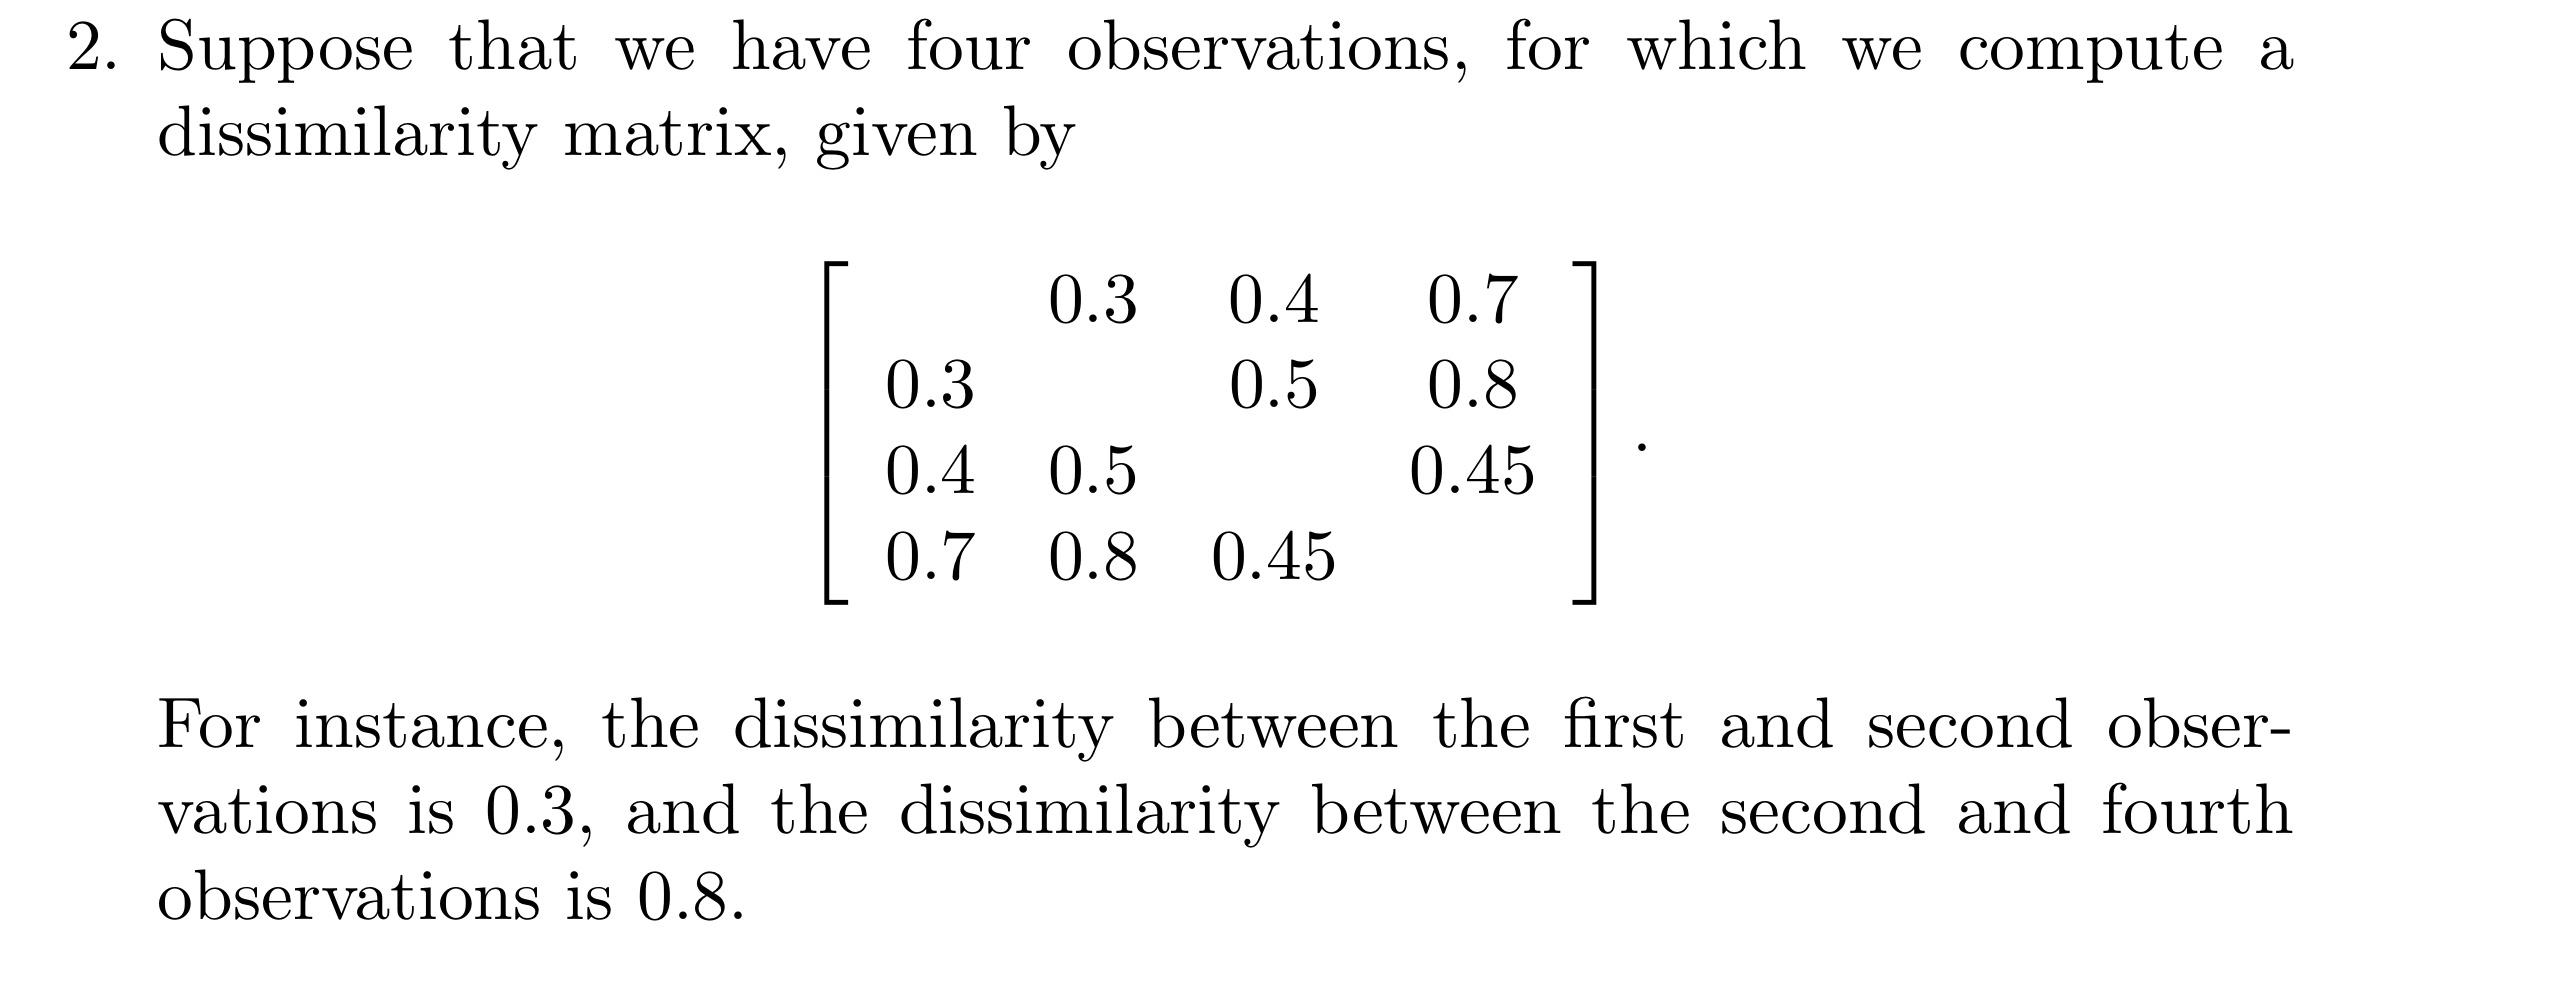

(a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observa- tions using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.

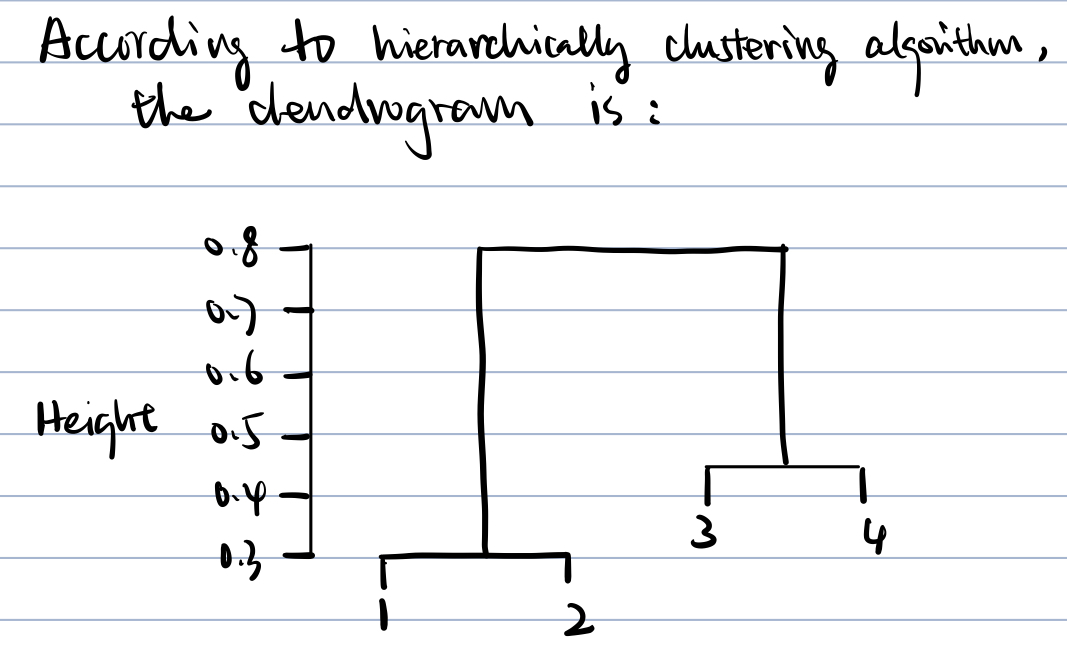

(b) Repeat (a), this time using single linkage clustering.

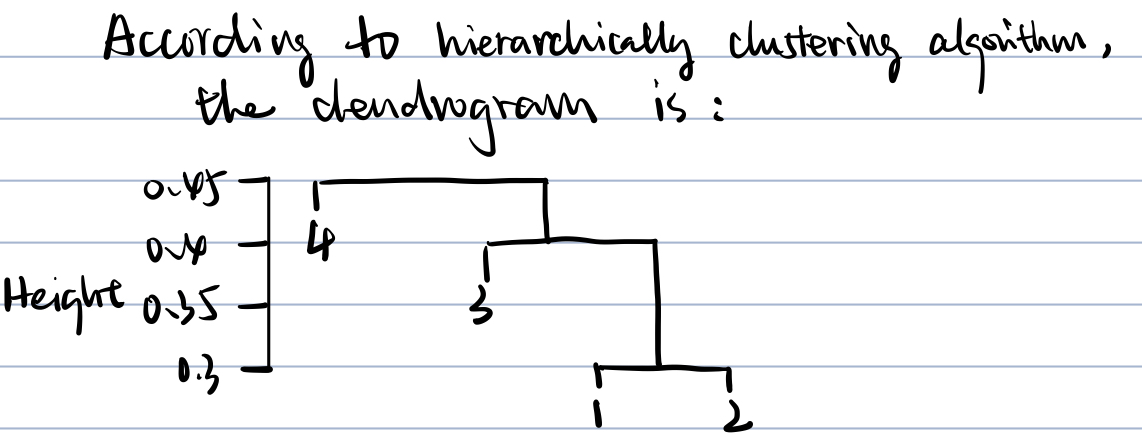

(c) Suppose that we cut the dendrogram obtained in (a) such that two clusters result. Which observations are in each cluster?

    observation 1 and 2 are in one cluster and observation 3 and 4 are in the other cluster.

(d) Suppose that we cut the dendrogram obtained in (b) such that two clusters result. Which observations are in each cluster?

    observation 1, 2 and 3 are in one cluster and observation 4 in the other cluster.

(e) It is mentioned in the chapter that at each fusion in the den- drogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

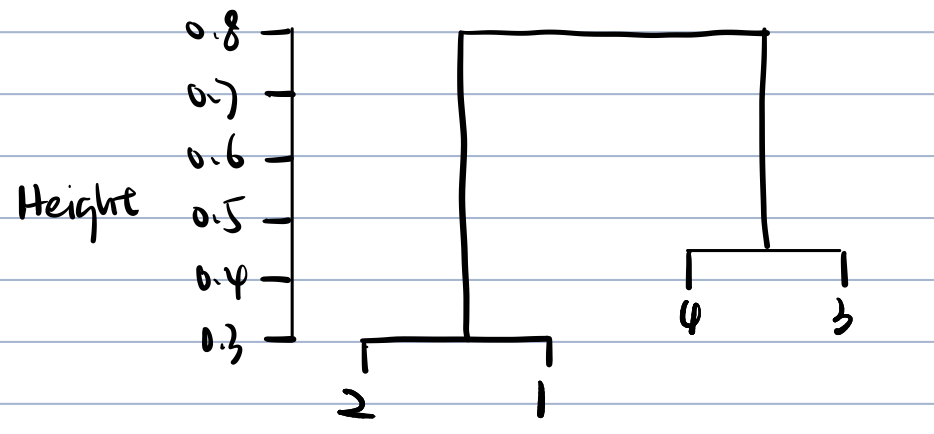